In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import plotly as py

In [2]:
#Set random seed
np.random.seed(42)

Text(0, 0.5, 'PBVC')

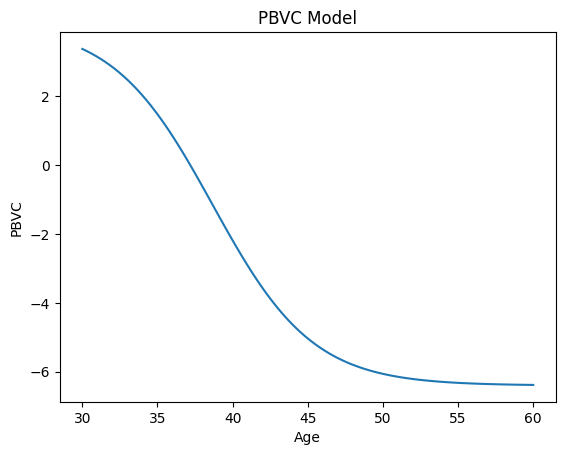

In [3]:
#Create a model of PBVC
#https://www.desmos.com/calculator/b1tvyx7y71
def pbvc_model(age):
    age_from_0 = age - 30
    y = ((-2.1) / ((0.2) + (0.2 * np.e ** (-1 * (0.3*age_from_0 - 2.6))))) + 4.1
    return y

#Graph pvbc_model
ages = np.linspace(30, 60, 100)
pbvc = pbvc_model(ages)
plt.plot(ages, pbvc)
plt.title('PBVC Model')
plt.xlabel('Age')
plt.ylabel('PBVC')

In [4]:
sienna_data = pd.DataFrame()
#Set the column names 
sienna_data = pd.DataFrame(columns=['Patient ID', 'Start Age', 'End Age', 'PBVC'])
#We will create synthetic SIENNA data for 150 patients
patient_id = np.arange(1,500)
patiend_id_col = []
start_age_col = []
end_age_col = []
pbvc_col = []

for patient in patient_id:
    #Each patient will have between 1 and 10 data entries
    num_entries = np.random.randint(1,11)
    #Each patient will have a random age between 25 and 50
    start_age = np.random.uniform(25,60)
    for entry in range(num_entries):
        #second age will be first age plus a number uniformly distributed between 0.75 and 1.25
        end_age = start_age + np.random.uniform(0.75,1.25)
        #PBVC will be calculated using the model, choose a random age between first and second age
        pbvc = pbvc_model(np.random.uniform(start_age + np.random.uniform(-1,1), end_age + np.random.uniform(-1,1)))
        #Add random noise to the PBVC of -0.2 to 0.2
        pbvc = pbvc + np.random.uniform(-0.2, 0.2)
        #Add the data to the column variables
        patiend_id_col.append(patient)
        start_age_col.append(start_age)
        end_age_col.append(end_age)
        pbvc_col.append(pbvc)
        #Set first age to second age for the next entry
        start_age = end_age
        

#Add the column variables to the dataframe
sienna_data['Patient ID'] = patiend_id_col
sienna_data['Start Age'] = start_age_col
sienna_data['End Age'] = end_age_col
sienna_data['PBVC'] = pbvc_col
display(sienna_data)

,Patient ID,Start Age,End Age,PBVC
0,1,52.879005,53.720722,-6.444097
1,1,53.720722,54.700346,-6.465800
2,1,54.700346,55.811346,-6.271096
3,1,55.811346,56.867172,-6.371088
4,1,56.867172,57.640505,-6.318497
...,...,...,...,...
2603,498,47.819968,48.998033,-5.697515
2604,499,28.798473,29.810818,3.664143
2605,499,29.810818,30.667325,3.421483
2606,499,30.667325,31.625223,3.064224


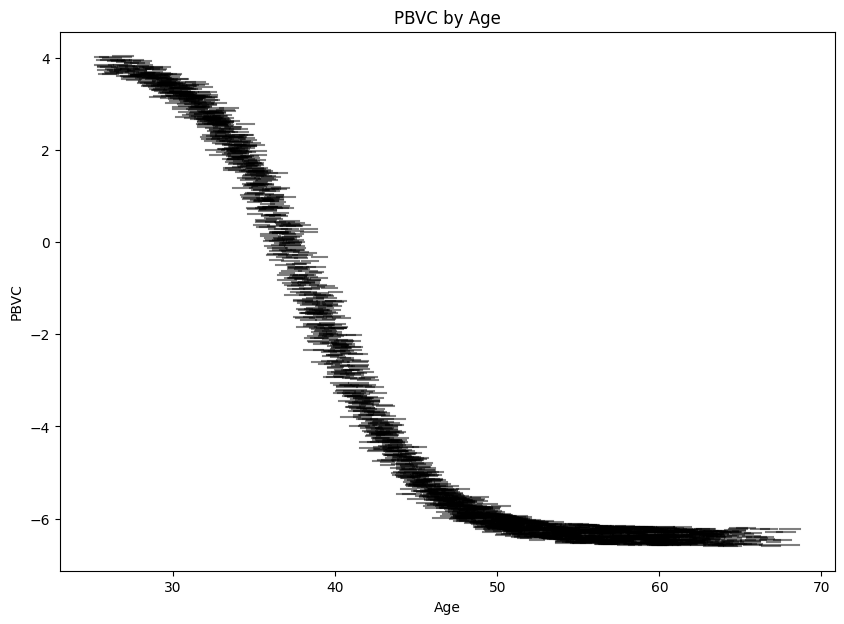

In [5]:
#Plot sienna_data
plt.figure(figsize=(10, 7))
for index, row in sienna_data.iterrows():
    plt.plot([row['Start Age'], row['End Age']], [row['PBVC'], row['PBVC']], color='black', alpha=0.5)
plt.title('PBVC by Age')
plt.xlabel('Age')
plt.ylabel('PBVC')
plt.show()

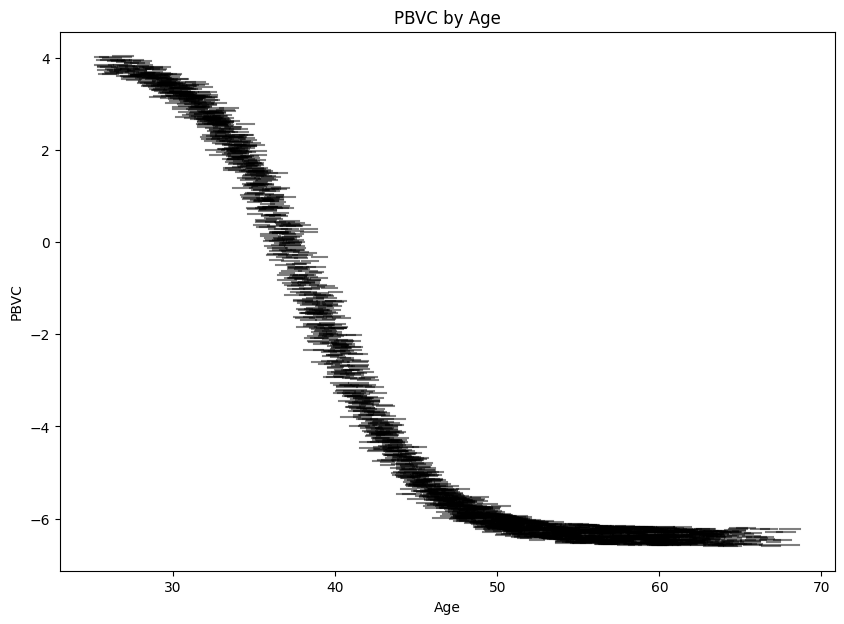

In [6]:
#Use seaborn to plot the data with a regression line
plt.figure(figsize=(10, 7))
#Plot horizontal lines for each patient
for index, row in sienna_data.iterrows():
    sns.lineplot(x=[row['Start Age'], row['End Age']], y=[row['PBVC'], row['PBVC']], color='black', alpha=0.5)
#sns.lineplot(x='Start Age', y='PBVC', data=sienna_data, alpha=0.5, hue='Patient ID')
plt.title('PBVC by Age')
plt.xlabel('Age')
plt.ylabel('PBVC')
plt.show()

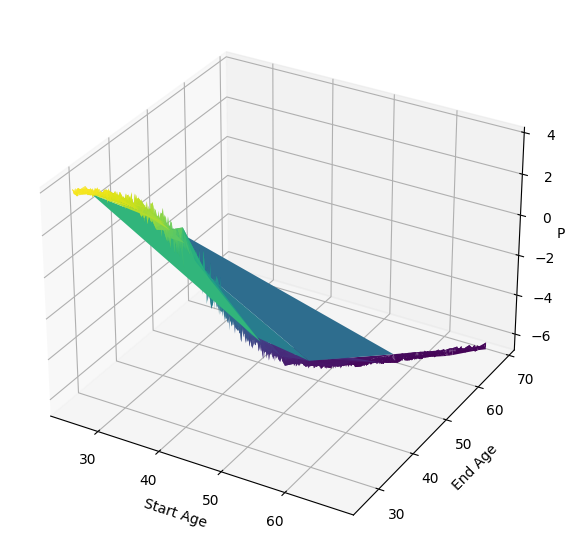

In [7]:
#Plotting sienna_data with seaborn as a 3D mesh plot
#The X axis will be the start age, the Y axis will be the end age, and the Z axis will be the PBVC
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(sienna_data['Start Age'], sienna_data['End Age'], sienna_data['PBVC'], cmap='viridis', edgecolor='none')
ax.set_xlabel('Start Age')
ax.set_ylabel('End Age')
ax.set_zlabel('PBVC')
plt.show()

In [8]:
#Use plotly to create an interactive 3D mesh plot
import plotly.graph_objects as go
fig = go.Figure(data=[go.Mesh3d(x=sienna_data['Start Age'], y=sienna_data['End Age'], z=sienna_data['PBVC'], color='lightpink', opacity=0.50)])
fig.update_layout(title='PBVC by Age', scene = dict(xaxis_title='Start Age', yaxis_title='End Age', zaxis_title='PBVC'))
#Increase the scale of the zaxis
fig.show()
